## Kaden Gosman 
## CECS 590-1 
## Onion Detector
# Credits
https://www.kaggle.com/mytymohan/sarcasm-with-keras

https://arxiv.org/pdf/1805.08751.pdf

# Project Overview
There have been many applications for sarcasm detection as well as fake news. The goal was to try and develop a context sensetive sarcasm dector that would use data from social media. However I was worried I would be limited to small models as my gpu does not have support for general use yet and training large models would be unrealistic. These pervious attempts used large complex models with numerous and complex parameters. If I attempted to scale back and simplify the models I would be left with little to no results and would not feel as accomplished as I did non have accurateentation of my model.
<br>
<br>
Thus I decided to simplify my data set to simplify the complexity required for the model. I found a dataset with article headlines from the satirical site *The Onion* and a real news outlet *The Huffington Post*. The goal would shift from binary classification of sarcasm to a more achievable binary classification of where the headline is from either *The Onion* or *The Huffington Post*. I still have future plans when my GPU get ROCM support to attack the larger problem however it is not feasible at this time for this project
<br>
<br>
This project is still significant as being a stepping stone in the future to detect deeper more nuanced sarcasm (emojis) as well as broadening the dataset to be from more sources to be a more generalized fake news detector as it would be tasked with finding fake news and not just "news" for *The Onion*

# Dataset Description
The dataset is a json file that contains the following attributres: binary classificaton of sarcastic or not, headline as a string, article link (this is unused for the purposes of the project but could be useflu in a expantion on this project to read full articles rather than just headline), and the source which is redundant for this application as I am using the is_sarcastic attribute. I have show the head of the pandas dataframe as a preview for easy viewing.
<br>
<br>
After data is loaded the pie chart under the visualize data section represents the data split between sarcastic and acclaim articles. The bar chart below it in the same section is a simple count of the top 20 most occuring words among the whole dataset without any cleaning/housekeeping. Review 2 material is included below and it is implementation of NLP data cleaning processes studied in this course with stemming/lemmitization and removal of stopwords.

# Import Statements

In [1]:
import json
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize 
from wordcloud import WordCloud
import itertools
from sklearn.metrics import confusion_matrix

# Read Data

In [2]:
pd.set_option('display.max_colwidth', -1)
raw_data = pd.read_json('./Sarcasm_Headlines_Dataset_v2.json',lines=True)
raw_data['source'] = raw_data['article_link'].apply(lambda x: re.findall(r'\w+', x)[2])
raw_data.head()

C:\Users\kaden\Anaconda3\envs\DeepLearning\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  """Entry point for launching an IPython kernel.


,is_sarcastic,headline,article_link,source
0,1,thirtysomething scientists unveil doomsday clock of hair loss,https://www.theonion.com/thirtysomething-scientists-unveil-doomsday-clock-of-hai-1819586205,theonion
1,0,"dem rep. totally nails why congress is falling short on gender, racial equality",https://www.huffingtonpost.com/entry/donna-edwards-inequality_us_57455f7fe4b055bb1170b207,huffingtonpost
2,0,eat your veggies: 9 deliciously different recipes,https://www.huffingtonpost.com/entry/eat-your-veggies-9-delici_b_8899742.html,huffingtonpost
3,1,inclement weather prevents liar from getting to work,https://local.theonion.com/inclement-weather-prevents-liar-from-getting-to-work-1819576031,theonion
4,1,mother comes pretty close to using word 'streaming' correctly,https://www.theonion.com/mother-comes-pretty-close-to-using-word-streaming-cor-1819575546,theonion


# Visualize Data

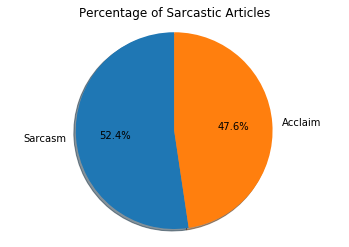

In [3]:
sar_cnt = raw_data['is_sarcastic'].value_counts()
labels = 'Sarcasm', 'Acclaim'
size = (np.array((sar_cnt / sar_cnt.sum()) * 100))

fig1, ax1 = plt.subplots()
ax1.pie(size, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.title("Percentage of Sarcastic Articles")
plt.show()

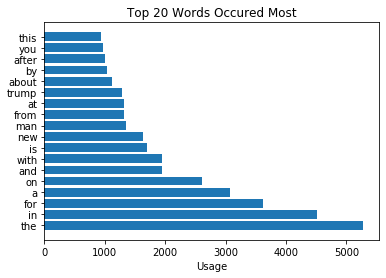

In [4]:
words = raw_data['headline'].str.split(expand=True).unstack().value_counts()
objects = words.index.values[2:20]
y_pos = np.arange(len(objects))
performance = words.values[2:20]

plt.barh(y_pos, performance, align='center', alpha=1.0)
plt.yticks(y_pos, objects)
plt.xlabel('Usage')
plt.title('Top 20 Words Occured Most')
plt.show()

# Remove Stopwords

In [5]:
stop_words = set(stopwords.words('english'))

sar_filtered_list = []
sar_word_tokens = []
sar_data = raw_data.loc[raw_data.is_sarcastic == 1]
sar_data.reset_index(drop=True, inplace=True)
for i in range(len(sar_data['headline'])):
    sar_token = sar_data['headline'][i].split()
    sar_word_tokens.append(sar_token)
    
sar_filtered_sentences = [] 
for j in range(len(sar_word_tokens)): 
    sar_filtered_sentence = []
    for w in sar_word_tokens[j]: 
        if w not in stop_words: 
            sar_filtered_sentence.append(w) 
            sar_filtered_list.append(w)
    sar_filtered_sentences.append(sar_filtered_sentence)

In [6]:
acc_filtered_list = []
acc_word_tokens = []
acc_data = raw_data.loc[raw_data.is_sarcastic == 0]
acc_data.reset_index(drop=True, inplace=True)
for i in range(len(acc_data['headline'])):
    acc_token = acc_data['headline'][i].split()
    acc_word_tokens.append(acc_token)
    
acc_filtered_sentences = [] 
for j in range(len(acc_word_tokens)): 
    acc_filtered_sentence = []
    for w in acc_word_tokens[j]: 
        if w not in stop_words: 
            acc_filtered_sentence.append(w)
            acc_filtered_list.append(w)
    acc_filtered_sentences.append(acc_filtered_sentence)

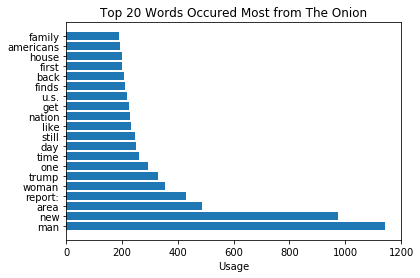

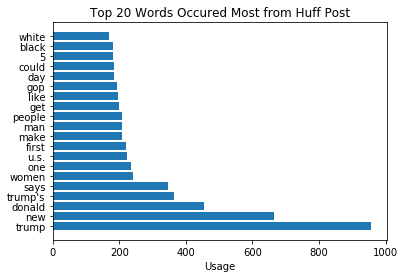

In [7]:
from collections import Counter
sar_cnt = Counter(sar_filtered_list)
acc_cnt = Counter(acc_filtered_list)

sar_cnt_df = pd.DataFrame(list(sar_cnt.items()), columns = ['Words', 'Freq'])
sar_cnt_df = sar_cnt_df.sort_values(by=['Freq'], ascending=False)
acc_cnt_df = pd.DataFrame(list(acc_cnt.items()), columns = ['Words', 'Freq'])
acc_cnt_df = acc_cnt_df.sort_values(by=['Freq'], ascending=False)

sar_cnt_df_20 = sar_cnt_df.head(20)
acc_cnt_df_20 = acc_cnt_df.head(20)

y_pos = np.arange(len(sar_cnt_df_20['Words']))
plt.barh(y_pos, sar_cnt_df_20['Freq'], align='center', alpha=1.0)
plt.yticks(y_pos, sar_cnt_df_20['Words'])
plt.xlabel('Usage')
plt.title('Top 20 Words Occured Most from The Onion')
plt.show()

y_pos = np.arange(len(acc_cnt_df_20['Words']))
plt.barh(y_pos, acc_cnt_df_20['Freq'], align='center', alpha=1.0)
plt.yticks(y_pos, acc_cnt_df_20['Words'])
plt.xlabel('Usage')
plt.title('Top 20 Words Occured Most from Huff Post')
plt.show()

# Lemmitization

In [8]:
from nltk.stem import WordNetLemmatizer
stemmer = nltk.stem.SnowballStemmer("english", ignore_stopwords=True)
lemm = WordNetLemmatizer()
sar_lemm_sentences = []
sar_lem = []
for headline in sar_filtered_sentences:
    sar_lemm = []
    for word in headline:
        sar_word_lemm = lemm.lemmatize(word)
        #word_stem = stemmer.stem(word)
        sar_lemm.append(sar_word_lemm)
    sar_lemm_sentences.append(sar_lemm)
    
acc_lemm_sentences = []
acc_lemm = []
for headline in acc_filtered_sentences:
    acc_lemm = []
    for word in headline:
        acc_word_lemm = lemm.lemmatize(word)
        #word_stem = stemmer.stem(word)
        acc_lemm.append(acc_word_lemm)
    acc_lemm_sentences.append(acc_lemm)

In [9]:
#print(sar_lemm_sentences)
#print(acc_lemm_sentences)

# Word Cloud

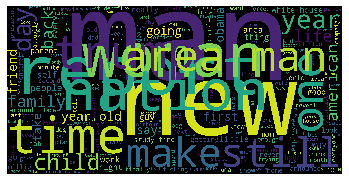

In [16]:
%matplotlib inline
sar_list_wd = list(itertools.chain(*sar_lemm_sentences))
sar_cloud = WordCloud(background_color='black', width=20000,height=10000).\
                generate(" ".join(sar_list_wd))
plt.imshow(sar_cloud)
plt.axis('off')
plt.show()

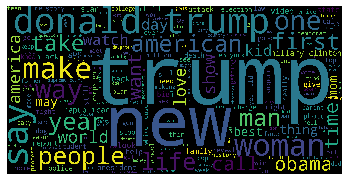

In [42]:
%matplotlib inline
acc_list_wd = list(itertools.chain(*acc_lemm_sentences))
acc_cloud = WordCloud(background_color='black', width=20000,height=10000).\
                generate(" ".join(acc_list_wd))
plt.imshow(acc_cloud)
plt.axis('off')
plt.show()

# Assembling Previously Segmented Data

In [9]:
# cleaned_data_x = list(itertools.chain(sar_lemm_sentences,acc_lemm_sentences))
cleaned_data_x = []
for sentence in sar_lemm_sentences:
    headline = ""
    headline = ' '.join(map(str, sentence))
    cleaned_data_x.append(headline)

In [10]:
for sentence_acc in acc_lemm_sentences:
    headline_acc = ""
    headline_acc = ' '.join(map(str, sentence_acc))
    cleaned_data_x.append(headline_acc)
    

In [11]:
sar_y = np.ones(len(sar_lemm_sentences))
acc_y = np.zeros(len(acc_lemm_sentences))

cleaned_y = list(itertools.chain(sar_y,acc_y))

cleaned_data_x = np.array(cleaned_data_x)
cleaned_y = np.array(cleaned_y)

# Aprroach 1 (Raw Data)

In [39]:
from sklearn.preprocessing import LabelEncoder
X = raw_data.headline
Y =  raw_data.is_sarcastic
le = LabelEncoder()
Y = le.fit_transform(Y)
Y = Y.reshape(-1,1)
print(X.shape)
print(Y.shape)

(28619,)
(28619, 1)


In [40]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2)

### Tokenizing

In [41]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence
max_words = 1000
max_len = 150
tok = Tokenizer(num_words=max_words)
tok.fit_on_texts(X_train)
sequences = tok.texts_to_sequences(X_train)
sequences_matrix = sequence.pad_sequences(sequences,maxlen=max_len)

In [42]:
from keras.layers import LSTM, Activation, Dense, Dropout, Input, Embedding
from keras.optimizers import RMSprop
from keras.models import Model
def RNN():
    inputs = Input(name='inputs',shape=[max_len])
    layer = Embedding(max_words,50,input_length=max_len)(inputs)
    layer = LSTM(64)(layer)
    layer = Dense(256,name='FC1')(layer)
    layer = Activation('relu')(layer)
    layer = Dropout(0.2)(layer)
    layer = Dense(1,name='out_layer')(layer)
    layer = Activation('sigmoid')(layer)
    model = Model(inputs=inputs,outputs=layer)
    return model

In [43]:
model = RNN()
model.summary()
model.compile(loss='binary_crossentropy',optimizer=RMSprop(),metrics=['accuracy'])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inputs (InputLayer)          (None, 150)               0         
_________________________________________________________________
embedding_4 (Embedding)      (None, 150, 50)           50000     
_________________________________________________________________
lstm_4 (LSTM)                (None, 64)                29440     
_________________________________________________________________
FC1 (Dense)                  (None, 256)               16640     
_________________________________________________________________
activation_7 (Activation)    (None, 256)               0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 256)               0         
_________________________________________________________________
out_layer (Dense)            (None, 1)                 257       
__________

In [44]:
from keras.callbacks import EarlyStopping
history1 = model.fit(sequences_matrix,Y_train,batch_size=100,epochs=5,
          validation_split=0.1)#,callbacks=[EarlyStopping(monitor='val_loss',min_delta=0.0001)])

Train on 20605 samples, validate on 2290 samples
Epoch 1/5
20605/20605 [==============================] - 53s 3ms/step - loss: 0.5393 - acc: 0.7640 - val_loss: 0.4302 - val_acc: 0.8070
Epoch 2/5
20605/20605 [==============================] - 52s 3ms/step - loss: 0.3841 - acc: 0.8268 - val_loss: 0.3851 - val_acc: 0.8205
Epoch 3/5
20605/20605 [==============================] - 54s 3ms/step - loss: 0.3665 - acc: 0.8365 - val_loss: 0.4282 - val_acc: 0.8079
Epoch 4/5
20605/20605 [==============================] - 56s 3ms/step - loss: 0.3499 - acc: 0.8427 - val_loss: 0.4015 - val_acc: 0.8092
Epoch 5/5
20605/20605 [==============================] - 59s 3ms/step - loss: 0.3393 - acc: 0.8483 - val_loss: 0.3955 - val_acc: 0.8197


In [45]:
test_sequences = tok.texts_to_sequences(X_test)
test_sequences_matrix = sequence.pad_sequences(test_sequences,maxlen=max_len)

In [46]:
accr = model.evaluate(test_sequences_matrix,Y_test)
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))

5724/5724 [==============================] - 9s 2ms/step
Test set
  Loss: 0.402
  Accuracy: 0.820


In [20]:
# Courtesy of Dr. Daniel Sierrasosa. Professor at the University of Louisville
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

In [47]:
y_pred = model.predict(np.array(test_sequences_matrix))
cnf_matrix1 = confusion_matrix(Y_test,y_pred.round())
class_names = ['0','1']
plt.rcdefaults()

Confusion matrix, without normalization
[[2396  628]
 [ 401 2299]]


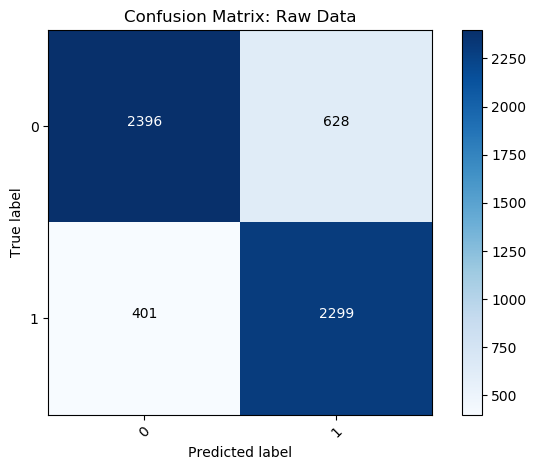

In [52]:
plot_confusion_matrix(cnf_matrix1, classes=class_names, title='Confusion Matrix: Raw Data')

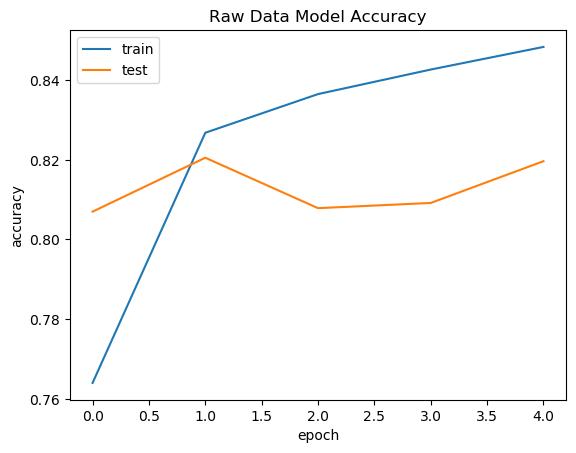

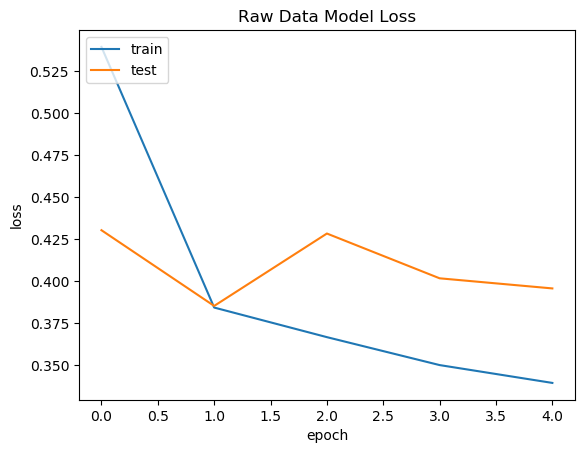

In [50]:
plt.plot(history1.history['acc'])
plt.plot(history1.history['val_acc'])
plt.title('Raw Data Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('Raw Data Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Aprroach 2 (Cleaned Data)

In [53]:
from sklearn.preprocessing import LabelEncoder
Y =  cleaned_y
le = LabelEncoder()
Y = le.fit_transform(Y)
Y = Y.reshape(-1,1)

### Tokenizing

In [54]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence
max_words = 1000
max_len = len(max(cleaned_data_x))
tok = Tokenizer(num_words=max_words)
tok.fit_on_texts(cleaned_data_x)
sequences = tok.texts_to_sequences(cleaned_data_x)
X = sequence.pad_sequences(sequences,maxlen=max_len)

In [55]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2)

In [56]:
from keras.layers import LSTM, Activation, Dense, Dropout, Input, Embedding
from keras.optimizers import RMSprop
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D

embed_dim = 32

model = Sequential()
model.add(Embedding(max_words, embed_dim,input_length = max_len))
model.add(LSTM(64))
model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(1))
model.add(Activation('sigmoid'))
model.summary()
model.compile(loss='binary_crossentropy',optimizer=RMSprop(),metrics=['accuracy'])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, 43, 32)            32000     
_________________________________________________________________
lstm_5 (LSTM)                (None, 64)                24832     
_________________________________________________________________
dense_3 (Dense)              (None, 256)               16640     
_________________________________________________________________
activation_9 (Activation)    (None, 256)               0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 257       
_________________________________________________________________
activation_10 (Activation)   (None, 1)                 0         
Total para

In [57]:
from keras.callbacks import EarlyStopping
history2 = model.fit(X_train,Y_train,batch_size=100,epochs=25,
          validation_split=0.1)#,callbacks=[EarlyStopping(monitor='val_loss',min_delta=0.0001)])

Train on 20605 samples, validate on 2290 samples
Epoch 1/25
20605/20605 [==============================] - 22s 1ms/step - loss: 0.5910 - acc: 0.6722 - val_loss: 0.5375 - val_acc: 0.7201
Epoch 2/25
20605/20605 [==============================] - 19s 939us/step - loss: 0.5056 - acc: 0.7413 - val_loss: 0.5117 - val_acc: 0.7424
Epoch 3/25
20605/20605 [==============================] - 20s 988us/step - loss: 0.4942 - acc: 0.7502 - val_loss: 0.5152 - val_acc: 0.7397
Epoch 4/25
20605/20605 [==============================] - 21s 1ms/step - loss: 0.4856 - acc: 0.7550 - val_loss: 0.5124 - val_acc: 0.7332
Epoch 5/25
20605/20605 [==============================] - 21s 1ms/step - loss: 0.4742 - acc: 0.7613 - val_loss: 0.5138 - val_acc: 0.7454
Epoch 6/25
20605/20605 [==============================] - 21s 1ms/step - loss: 0.4630 - acc: 0.7659 - val_loss: 0.5360 - val_acc: 0.7384
Epoch 7/25
20605/20605 [==============================] - 21s 1ms/step - loss: 0.4566 - acc: 0.7718 - val_loss: 0.5239 - val_

In [58]:
accr = model.evaluate(X_test,Y_test)
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))

5724/5724 [==============================] - 3s 523us/step
Test set
  Loss: 0.638
  Accuracy: 0.719


In [59]:
y_pred = model.predict(np.array(X_test))
cnf_matrix2 = confusion_matrix(Y_test,y_pred.round())
class_names = ['0','1']
plt.rcdefaults()

Confusion matrix, without normalization
[[2179  890]
 [ 717 1938]]


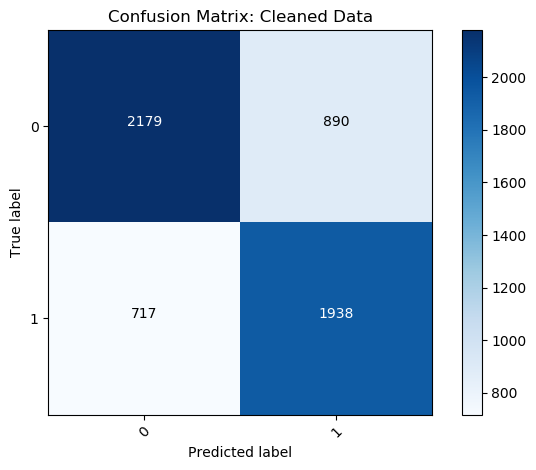

In [60]:
plot_confusion_matrix(cnf_matrix2, classes=class_names, title='Confusion Matrix: Cleaned Data')

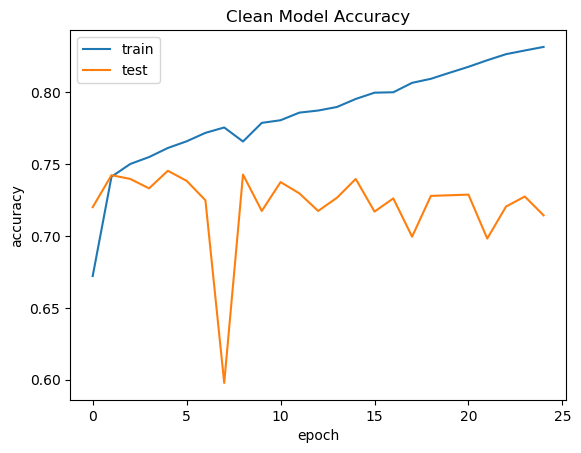

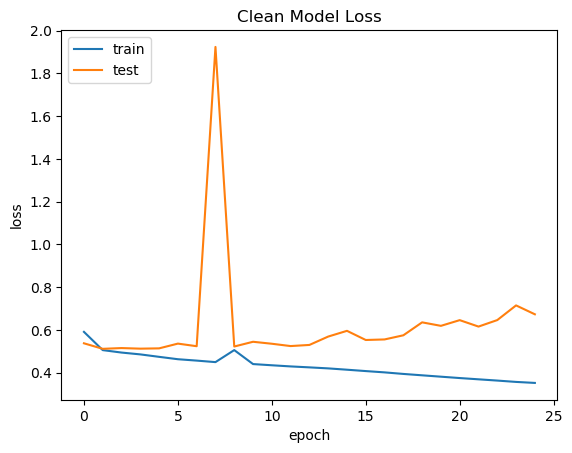

In [61]:
plt.plot(history2.history['acc'])
plt.plot(history2.history['val_acc'])
plt.title('Clean Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('Clean Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()